## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9824626	total: 59.8ms	remaining: 59.7s
1:	learn: 0.9631248	total: 60.8ms	remaining: 30.4s
2:	learn: 0.9422360	total: 61.9ms	remaining: 20.6s
3:	learn: 0.9273055	total: 63ms	remaining: 15.7s
4:	learn: 0.9103624	total: 63.9ms	remaining: 12.7s
5:	learn: 0.8935159	total: 64.9ms	remaining: 10.8s
6:	learn: 0.8764194	total: 65.9ms	remaining: 9.35s
7:	learn: 0.8612232	total: 66.8ms	remaining: 8.28s
8:	learn: 0.8463015	total: 67.5ms	remaining: 7.43s
9:	learn: 0.8301674	total: 68.2ms	remaining: 6.75s
10:	learn: 0.8160364	total: 69ms	remaining: 6.21s
11:	learn: 0.8017450	total: 69.8ms	remaining: 5.75s
12:	learn: 0.7883369	total: 70.6ms	remaining: 5.36s
13:	learn: 0.7748412	total: 71.4ms	remaining: 5.03s
14:	learn: 0.7611512	total: 72.5ms	remaining: 4.76s
15:	learn: 0.7467085	total: 73.4ms	remaining: 4.51s
16:	learn: 0.7357217	total: 74.2ms	remaining: 4.29s
17:	learn: 0.7243804	total: 75ms	remaining: 4.09s
18:	learn: 0.7123451	total: 75.8ms	remaining: 3.91

60:	learn: 0.4181302	total: 110ms	remaining: 1.7s
61:	learn: 0.4138946	total: 111ms	remaining: 1.68s
62:	learn: 0.4112558	total: 112ms	remaining: 1.66s
63:	learn: 0.4072795	total: 113ms	remaining: 1.65s
64:	learn: 0.4034864	total: 113ms	remaining: 1.63s
65:	learn: 0.3996196	total: 114ms	remaining: 1.62s
66:	learn: 0.3960920	total: 115ms	remaining: 1.6s
67:	learn: 0.3929127	total: 116ms	remaining: 1.59s
68:	learn: 0.3900364	total: 117ms	remaining: 1.57s
69:	learn: 0.3872863	total: 117ms	remaining: 1.56s
70:	learn: 0.3844892	total: 118ms	remaining: 1.55s
71:	learn: 0.3804351	total: 119ms	remaining: 1.54s
72:	learn: 0.3777350	total: 120ms	remaining: 1.52s
73:	learn: 0.3740796	total: 121ms	remaining: 1.51s
74:	learn: 0.3712519	total: 122ms	remaining: 1.5s
75:	learn: 0.3684545	total: 123ms	remaining: 1.49s
76:	learn: 0.3655908	total: 124ms	remaining: 1.48s
77:	learn: 0.3634595	total: 124ms	remaining: 1.47s
78:	learn: 0.3600114	total: 125ms	remaining: 1.46s
79:	learn: 0.3583012	total: 126ms	

157:	learn: 0.2480764	total: 191ms	remaining: 1.02s
158:	learn: 0.2470129	total: 192ms	remaining: 1.01s
159:	learn: 0.2463286	total: 193ms	remaining: 1.01s
160:	learn: 0.2455801	total: 194ms	remaining: 1.01s
161:	learn: 0.2444871	total: 195ms	remaining: 1.01s
162:	learn: 0.2438467	total: 195ms	remaining: 1s
163:	learn: 0.2425631	total: 196ms	remaining: 1s
164:	learn: 0.2416922	total: 197ms	remaining: 997ms
165:	learn: 0.2408744	total: 198ms	remaining: 994ms
166:	learn: 0.2402720	total: 199ms	remaining: 991ms
167:	learn: 0.2394426	total: 200ms	remaining: 988ms
168:	learn: 0.2388881	total: 200ms	remaining: 985ms
169:	learn: 0.2378145	total: 201ms	remaining: 983ms
170:	learn: 0.2370483	total: 202ms	remaining: 979ms
171:	learn: 0.2364031	total: 203ms	remaining: 977ms
172:	learn: 0.2356307	total: 204ms	remaining: 974ms
173:	learn: 0.2350322	total: 205ms	remaining: 971ms
174:	learn: 0.2344483	total: 205ms	remaining: 968ms
175:	learn: 0.2338136	total: 206ms	remaining: 966ms
176:	learn: 0.2332

285:	learn: 0.1768871	total: 301ms	remaining: 751ms
286:	learn: 0.1765384	total: 302ms	remaining: 750ms
287:	learn: 0.1762028	total: 303ms	remaining: 748ms
288:	learn: 0.1756954	total: 303ms	remaining: 747ms
289:	learn: 0.1753862	total: 304ms	remaining: 745ms
290:	learn: 0.1750012	total: 305ms	remaining: 743ms
291:	learn: 0.1747311	total: 306ms	remaining: 741ms
292:	learn: 0.1742824	total: 307ms	remaining: 740ms
293:	learn: 0.1739045	total: 308ms	remaining: 739ms
294:	learn: 0.1735695	total: 309ms	remaining: 738ms
295:	learn: 0.1731424	total: 310ms	remaining: 737ms
296:	learn: 0.1729261	total: 311ms	remaining: 735ms
297:	learn: 0.1725759	total: 311ms	remaining: 733ms
298:	learn: 0.1722205	total: 313ms	remaining: 733ms
299:	learn: 0.1720337	total: 314ms	remaining: 732ms
300:	learn: 0.1714249	total: 314ms	remaining: 730ms
301:	learn: 0.1711066	total: 315ms	remaining: 729ms
302:	learn: 0.1707205	total: 316ms	remaining: 727ms
303:	learn: 0.1704084	total: 317ms	remaining: 725ms
304:	learn: 

383:	learn: 0.1476836	total: 382ms	remaining: 613ms
384:	learn: 0.1474155	total: 383ms	remaining: 612ms
385:	learn: 0.1472809	total: 384ms	remaining: 610ms
386:	learn: 0.1470590	total: 384ms	remaining: 609ms
387:	learn: 0.1467998	total: 385ms	remaining: 608ms
388:	learn: 0.1465064	total: 386ms	remaining: 606ms
389:	learn: 0.1464412	total: 387ms	remaining: 605ms
390:	learn: 0.1463815	total: 388ms	remaining: 604ms
391:	learn: 0.1460454	total: 389ms	remaining: 603ms
392:	learn: 0.1458802	total: 389ms	remaining: 601ms
393:	learn: 0.1455940	total: 390ms	remaining: 600ms
394:	learn: 0.1452731	total: 391ms	remaining: 599ms
395:	learn: 0.1450167	total: 392ms	remaining: 598ms
396:	learn: 0.1447861	total: 393ms	remaining: 596ms
397:	learn: 0.1444638	total: 393ms	remaining: 595ms
398:	learn: 0.1441297	total: 394ms	remaining: 594ms
399:	learn: 0.1440070	total: 395ms	remaining: 593ms
400:	learn: 0.1439230	total: 396ms	remaining: 591ms
401:	learn: 0.1436434	total: 397ms	remaining: 590ms
402:	learn: 

516:	learn: 0.1188056	total: 491ms	remaining: 459ms
517:	learn: 0.1186725	total: 492ms	remaining: 457ms
518:	learn: 0.1185484	total: 492ms	remaining: 456ms
519:	learn: 0.1183146	total: 493ms	remaining: 455ms
520:	learn: 0.1180881	total: 494ms	remaining: 454ms
521:	learn: 0.1178288	total: 495ms	remaining: 453ms
522:	learn: 0.1177577	total: 496ms	remaining: 452ms
523:	learn: 0.1174804	total: 496ms	remaining: 451ms
524:	learn: 0.1173148	total: 497ms	remaining: 450ms
525:	learn: 0.1171096	total: 498ms	remaining: 449ms
526:	learn: 0.1169637	total: 499ms	remaining: 448ms
527:	learn: 0.1167596	total: 500ms	remaining: 447ms
528:	learn: 0.1166884	total: 501ms	remaining: 446ms
529:	learn: 0.1163831	total: 502ms	remaining: 445ms
530:	learn: 0.1162741	total: 503ms	remaining: 444ms
531:	learn: 0.1159874	total: 503ms	remaining: 443ms
532:	learn: 0.1157011	total: 504ms	remaining: 442ms
533:	learn: 0.1154646	total: 505ms	remaining: 441ms
534:	learn: 0.1153615	total: 506ms	remaining: 440ms
535:	learn: 

614:	learn: 0.1013649	total: 572ms	remaining: 358ms
615:	learn: 0.1012474	total: 573ms	remaining: 357ms
616:	learn: 0.1011000	total: 574ms	remaining: 356ms
617:	learn: 0.1009867	total: 575ms	remaining: 355ms
618:	learn: 0.1007304	total: 576ms	remaining: 354ms
619:	learn: 0.1005294	total: 576ms	remaining: 353ms
620:	learn: 0.1003716	total: 577ms	remaining: 352ms
621:	learn: 0.1003234	total: 578ms	remaining: 351ms
622:	learn: 0.1001294	total: 579ms	remaining: 350ms
623:	learn: 0.1000701	total: 580ms	remaining: 349ms
624:	learn: 0.0999631	total: 580ms	remaining: 348ms
625:	learn: 0.0997204	total: 581ms	remaining: 347ms
626:	learn: 0.0994698	total: 582ms	remaining: 346ms
627:	learn: 0.0992867	total: 583ms	remaining: 345ms
628:	learn: 0.0990596	total: 583ms	remaining: 344ms
629:	learn: 0.0988172	total: 584ms	remaining: 343ms
630:	learn: 0.0987730	total: 585ms	remaining: 342ms
631:	learn: 0.0986865	total: 586ms	remaining: 341ms
632:	learn: 0.0986260	total: 587ms	remaining: 340ms
633:	learn: 

748:	learn: 0.0829959	total: 682ms	remaining: 228ms
749:	learn: 0.0829409	total: 683ms	remaining: 228ms
750:	learn: 0.0828063	total: 684ms	remaining: 227ms
751:	learn: 0.0826021	total: 684ms	remaining: 226ms
752:	learn: 0.0824363	total: 685ms	remaining: 225ms
753:	learn: 0.0823768	total: 686ms	remaining: 224ms
754:	learn: 0.0823120	total: 687ms	remaining: 223ms
755:	learn: 0.0821349	total: 688ms	remaining: 222ms
756:	learn: 0.0820882	total: 688ms	remaining: 221ms
757:	learn: 0.0819020	total: 689ms	remaining: 220ms
758:	learn: 0.0818377	total: 690ms	remaining: 219ms
759:	learn: 0.0818244	total: 691ms	remaining: 218ms
760:	learn: 0.0816504	total: 692ms	remaining: 217ms
761:	learn: 0.0815546	total: 693ms	remaining: 216ms
762:	learn: 0.0814519	total: 693ms	remaining: 215ms
763:	learn: 0.0813450	total: 694ms	remaining: 214ms
764:	learn: 0.0813272	total: 695ms	remaining: 213ms
765:	learn: 0.0813040	total: 696ms	remaining: 213ms
766:	learn: 0.0811233	total: 697ms	remaining: 212ms
767:	learn: 

842:	learn: 0.0734935	total: 762ms	remaining: 142ms
843:	learn: 0.0733800	total: 763ms	remaining: 141ms
844:	learn: 0.0732712	total: 764ms	remaining: 140ms
845:	learn: 0.0731415	total: 765ms	remaining: 139ms
846:	learn: 0.0730558	total: 766ms	remaining: 138ms
847:	learn: 0.0730164	total: 767ms	remaining: 137ms
848:	learn: 0.0728660	total: 768ms	remaining: 137ms
849:	learn: 0.0728467	total: 768ms	remaining: 136ms
850:	learn: 0.0727519	total: 769ms	remaining: 135ms
851:	learn: 0.0726527	total: 770ms	remaining: 134ms
852:	learn: 0.0725572	total: 771ms	remaining: 133ms
853:	learn: 0.0723857	total: 772ms	remaining: 132ms
854:	learn: 0.0723744	total: 773ms	remaining: 131ms
855:	learn: 0.0722180	total: 774ms	remaining: 130ms
856:	learn: 0.0721870	total: 775ms	remaining: 129ms
857:	learn: 0.0721599	total: 776ms	remaining: 128ms
858:	learn: 0.0720124	total: 777ms	remaining: 127ms
859:	learn: 0.0718911	total: 777ms	remaining: 127ms
860:	learn: 0.0718186	total: 778ms	remaining: 126ms
861:	learn: 

974:	learn: 0.0607742	total: 872ms	remaining: 22.4ms
975:	learn: 0.0606740	total: 873ms	remaining: 21.5ms
976:	learn: 0.0606484	total: 874ms	remaining: 20.6ms
977:	learn: 0.0605228	total: 874ms	remaining: 19.7ms
978:	learn: 0.0604147	total: 875ms	remaining: 18.8ms
979:	learn: 0.0603160	total: 876ms	remaining: 17.9ms
980:	learn: 0.0602737	total: 877ms	remaining: 17ms
981:	learn: 0.0601981	total: 878ms	remaining: 16.1ms
982:	learn: 0.0601268	total: 879ms	remaining: 15.2ms
983:	learn: 0.0600865	total: 880ms	remaining: 14.3ms
984:	learn: 0.0600010	total: 881ms	remaining: 13.4ms
985:	learn: 0.0599271	total: 881ms	remaining: 12.5ms
986:	learn: 0.0597996	total: 882ms	remaining: 11.6ms
987:	learn: 0.0597204	total: 883ms	remaining: 10.7ms
988:	learn: 0.0596694	total: 884ms	remaining: 9.83ms
989:	learn: 0.0595408	total: 885ms	remaining: 8.93ms
990:	learn: 0.0594174	total: 885ms	remaining: 8.04ms
991:	learn: 0.0592490	total: 886ms	remaining: 7.15ms
992:	learn: 0.0591611	total: 887ms	remaining: 6.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

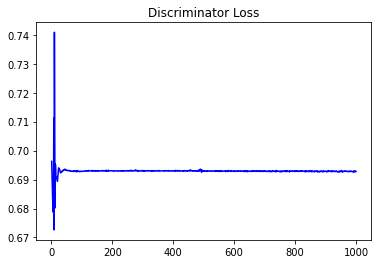

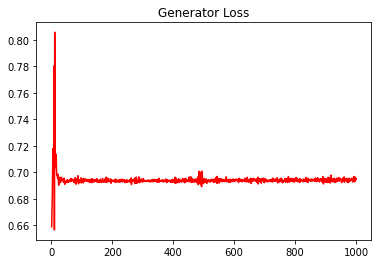

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08677930769337168


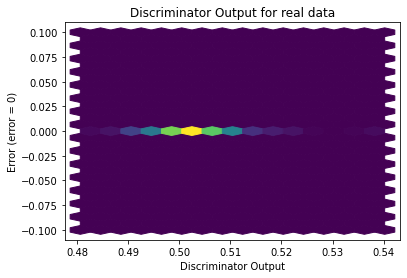

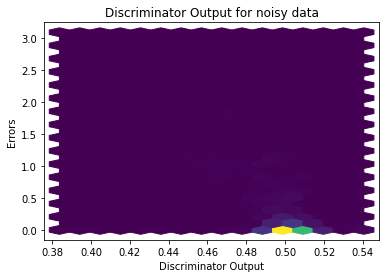

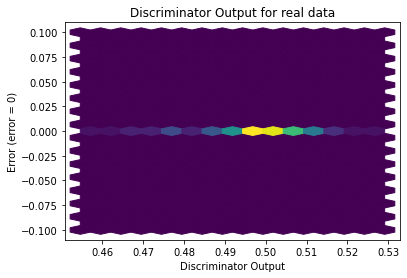

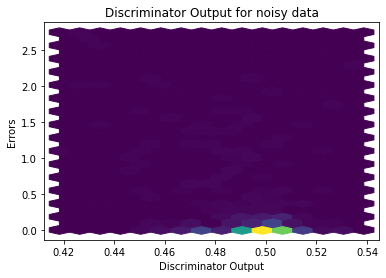

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


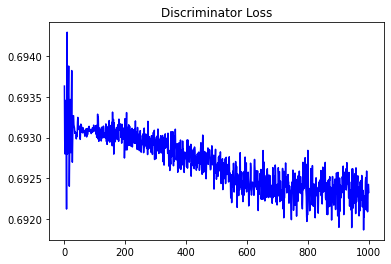

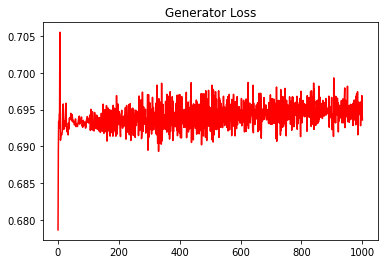

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11690825801129047


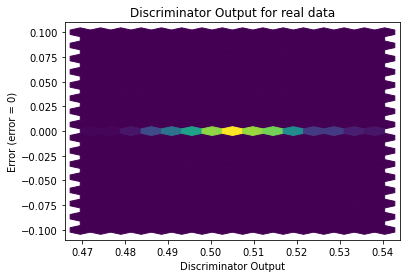

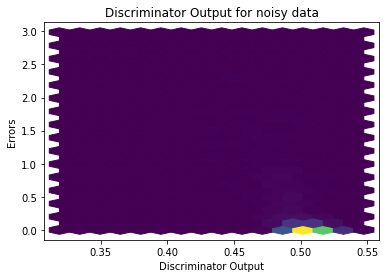

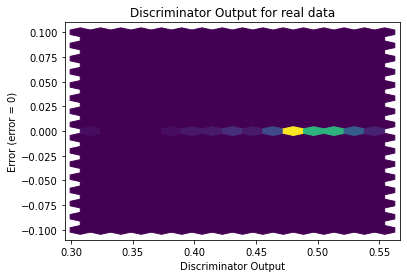

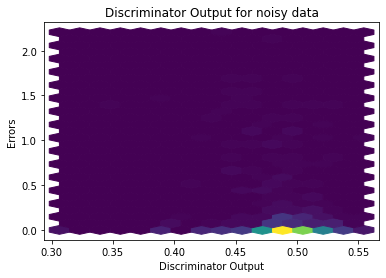

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3167]], requires_grad=True)
